Código para sen(x)

Lo primero que debemos hacer es importar los paquetes o librerias correspondientes , en nuestro caso numpy , math , keras , tensorflow
fijamos el generador de números aleatorios para asegurar la repetibilidad en el análisis

In [1]:
import random
import numpy as np
import math
import keras
from keras.layers import Dense , Activation
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
np.random.seed(123)
tf.random.set_seed(123)
print(keras.__version__)
print(np.__version__)

2.7.0
1.21.4


creamos 3 archivos train.txt que contendrá features y labels de los datos de entrenamiento, validation.txt que tiene los features y labels de los datos de validación por último test.txt que son solo las features de los datos test sin labels

In [3]:
outfile = open('train.txt','w')
first = 0
num = 0
for count in range(1000):
    num=(np.sin(first) +np.random.normal(0,0.1)+1)/2
    outfile.write(str(first)+ ' '+str(num)+'\n')
    first=first+(2*math.pi)/1000
outfile.close()
print('data train finished')
#######################################################################
first= 0
outfile = open('test.txt','w')
for count in range(250):
    outfile.write(str(first)+'\n')
    first = first+(2*math.pi+abs(np.random.normal(0,0.01)))/250
outfile.close()
print('data test finished')
######################################################################
first = abs(np.random.normal(0,0.1))
outfile = open('validation.txt','w')
for count in range(250):
    num=(np.sin(first) +np.random.normal(0,0.1)+1)/2
    outfile.write(str(first)+' '+str(num)+'\n')
outfile.close()
print('data validation finished')
######################################################################

data train finished
data test finished
data validation finished


Recogemos los datos en arrays 

In [4]:
#lectura de datos
input = open('train.txt','r')
Lines = input.readlines()
x= np.array([])
y = np.array([])
for line in Lines:
    lineS= line.split(' ')
    x= np.append(x,float(lineS[0]))
    y=np.append(y,float(lineS[1]))
input.close()
input =open('validation.txt','r')
Lines = input.readlines()
validationX = np.array([])
validationY = np.array([])
for line in Lines:
    lineS = line.split(' ')
    validationX = np.append(validationX,float(lineS[0]))
    validationY = np.append(validationY,float(lineS[1]))
input.close()

input = open('test.txt','r')
Lines = input.readlines()
test = np.array([])
for line in Lines:
    test = np.append(test,float(line))
print(len(validationX))



250


Inicializamos la red neuronal será una red sencilla que consta de 2 hidden layers + la input + la output : la input consta de 6 neuronas con activacion relu y una input shape de 1 , las siguientes también son activation relu y las neuronas son 5 y 4 y la de salida es sigmoid y 1 neurona

In [5]:

model = Sequential()
model.add(Dense(6, input_shape = (1,), activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Compilamos el model y seteamos los hiperparámetros la perdida, el optimizador , las métricas y la learning rate
Por otro lado en el fit añadimos 400 epochs , un bs de 32 y los datos de validación , el learning rate tiene un buen impacto a partir de 8e-4,por lo que  hemos usado 1e-3,por último definimos el early stopping que Daniel nos recomendó

In [6]:
earStop = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-6,patience=5,restore_best_weights=True)
callb = [earStop]
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.adam_v2.Adam(learning_rate=1e-3))
history =model.fit(x, y, epochs=150,validation_data=(validationX,validationY), batch_size=10,verbose = 1)

scores = model.evaluate(x, y)


Epoch 1/150
100/100 [==============================] - 1s 2ms/step - loss: 0.1125 - val_loss: 0.0025
Epoch 2/150
100/100 [==============================] - 0s 1ms/step - loss: 0.0996 - val_loss: 0.0040
Epoch 3/150
100/100 [==============================] - 0s 957us/step - loss: 0.0838 - val_loss: 0.0111
Epoch 4/150
100/100 [==============================] - 0s 937us/step - loss: 0.0642 - val_loss: 0.0302
Epoch 5/150
100/100 [==============================] - 0s 871us/step - loss: 0.0460 - val_loss: 0.0582
Epoch 6/150
100/100 [==============================] - 0s 1ms/step - loss: 0.0340 - val_loss: 0.0800
Epoch 7/150
100/100 [==============================] - 0s 932us/step - loss: 0.0277 - val_loss: 0.0898
Epoch 8/150
100/100 [==============================] - 0s 880us/step - loss: 0.0242 - val_loss: 0.0844
Epoch 9/150
100/100 [==============================] - 0s 870us/step - loss: 0.0217 - val_loss: 0.0757
Epoch 10/150
100/100 [==============================] - 0s 845us/step - loss: 0

Vemos la predicción de los datos de test y ploteamos también los datos de entrenamiento

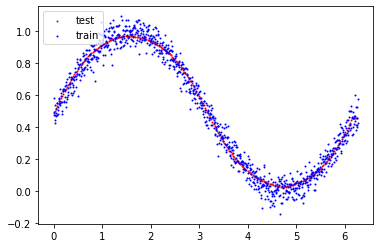

In [7]:
pr = model.predict(test)
x_plot = x
plt.scatter(test,pr,s=1,c='r')
plt.scatter(x_plot,y,s=1,c='b')
plt.legend(['test','train'], loc='upper left')
plt.show()

Representación de solo los datos de test

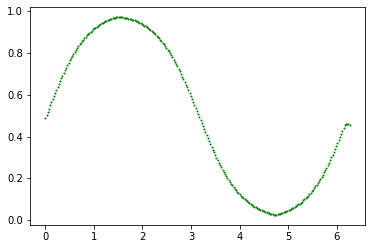

In [8]:
modelo = model.predict(test)
test_plot = test
plt.scatter(test_plot,modelo,s=1,c='g')
plt.show()


Histórico de las métricas

dict_keys(['loss', 'val_loss'])


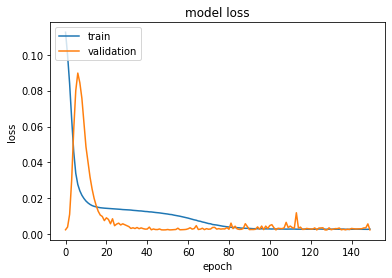

In [13]:
print(history.history.keys())

# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

El siguiente código guardaría el modelo en un h5 , lo tengo comentado si lo quieres guardar descoméntalo y pon el nombre que quieras

In [81]:
""" model.save('modelo_save.h5') """